In [1]:
%run -i "loaddata.py"
plt.style.use('seaborn-white')
plt.style.use('seaborn-ticks')
plt.rcParams["font.size"] = 13
import scipy.stats as st
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb

What is your name? [Simone/Jonathan/Marcus/Runi]Jonathan


In [10]:
# Choose wisely
save = False
test_on = 0
scale = True

In [11]:
keys = tuple(data_dict.keys())[::2]
features = data_dict[ list(data_dict.keys())[1] ]

# Clean and put into data_sort
data_sort = []
for key in keys:
    pre_data = []
    for i in range( len(data_dict[key]) ):
        if ( (data_dict[key][i,3:] != 0.).all() ) & ( (np.isnan(data_dict[key][i, :])!=True).all() ):
            pre_data.append( list(data_dict[key][i,:]) )
    data_sort.append(np.array(pre_data))
print("Shapes of different timeseries:",[i.shape for i in data_sort])

# def test_1_timeseries( test_index , scaler=False):
#     X_train = np.empty(( 0, data_sort[0].shape[1]-3))
#     y_train = np.array([])
#     for i in range(len(data_sort)):
#         if i!=test_index:
#             if scaler:
#                 data_scaled = np.copy(data_sort[i])
#                 scaler = StandardScaler()
#                 data_scaled[:,1] = scaler.fit_transform(data_scaled[:,1].reshape(-1, 1))[:,0]
#             else:
#                 data_scaled = data_sort[i]
#             X_train = np.append(X_train, data_scaled[:,3:], axis=0)
#             y_train = np.append(y_train, data_scaled[:,1])
#     if scaler:
#         data_scaled = np.copy(data_sort[test_index])
#         scaler = StandardScaler()
#         data_scaled[:,1] = scaler.fit_transform(data_scaled[:,1].reshape(-1, 1))[:,0]
#     else: 
#         data_scaled = data_sort[test_index]
#     X_test = data_scaled[:,3:]
#     y_test = data_scaled[:,1]
#     return X_train, X_test, y_train, y_test


def test_1_timeseries( test_index , scaler=False):
    X_train = np.empty(( 0, data_sort[0].shape[1]-3))
    y_train = np.array([])
    for i in range(len(data_sort)):
        if i!=test_index:
            if scaler:
                data_scaled = np.copy(data_sort[i])
                std = np.std(data_scaled[:,1])
                scaler = StandardScaler()
                data_scaled = scaler.fit_transform(data_scaled)
                data_scaled[:,1] = data_scaled[:,1]*std
            else:
                data_scaled = data_sort[i]
            X_train = np.append(X_train, data_scaled[:,3:], axis=0)
            y_train = np.append(y_train, data_scaled[:,1])
    if scaler:
        data_scaled = np.copy(data_sort[test_index])
        std = np.std(data_scaled[:,1])
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data_scaled)
        data_scaled[:,1] = data_scaled[:,1]*std
    else: 
        data_scaled = data_sort[test_index]
    X_test = data_scaled[:,3:]
    y_test = data_scaled[:,1]
    return X_train, X_test, y_train, y_test

Shapes of different timeseries: [(456, 28), (247, 28), (238, 28), (407, 28), (211, 28)]


In [12]:
X_train, X_test, y_train, y_test = test_1_timeseries(test_on, scaler=scale)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1103, 25), (456, 25), (1103,), (456,))

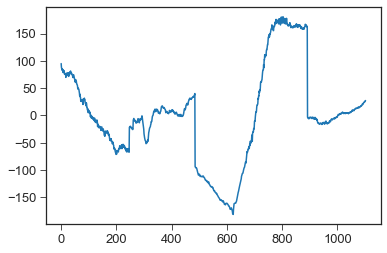

In [13]:
plt.plot(y_train)

In [14]:
# reg = xgb.XGBRegressor().fit(X_train, y_train)
reg = LinearRegression().fit(X_train, y_train)
y_pred_linear = reg.predict(X_test)

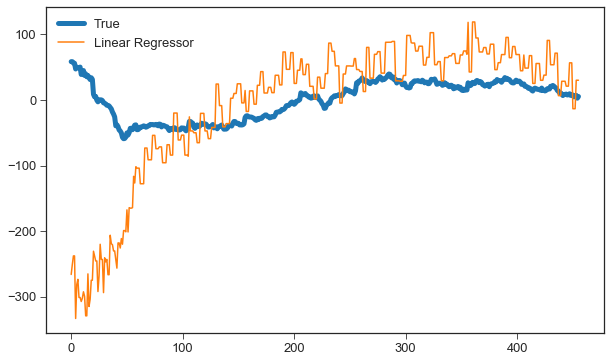

In [16]:
fig = plt.figure(figsize=(10,6))
plt.plot(y_test, label="True", lw=5.)
plt.plot(y_pred_linear, label="Linear Regressor")
plt.legend()
plt.show()